In [23]:
from classes.dataManagement import DataManagement 
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import difflib
import math  
import pandas as pd


dm = DataManagement()
import decimal





# 1. Dataset

In [2]:
x = np.array(dm.trainImages)
y = np.array(dm.trainLabels)

X = x / 255 #divise by 255 because each value is a white value (0 to 255)
y = y.reshape(len(y), 1)

#X = np.hstack((x, np.ones((x.shape[0], 1))))
print(X.shape)
print(y.shape)

#theta
theta = np.random.rand(len(X[0]),1)
print(theta.shape)


(60000, 784)
(60000, 1)
(784, 1)


# Modèle

In [3]:
#Modèle
def model(X, theta):
    return X.dot(theta)

In [4]:
print(model(X,theta))
#plt.plot(x, model(X,theta))

[[53.28906205]
 [59.13933624]
 [38.17638687]
 ...
 [45.93517459]
 [43.58134764]
 [36.47615635]]


In [5]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((X.dot(theta) - y) ** 2)

In [6]:
cost_function(X, y, theta)

1281.63519700577

In [7]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [8]:
def gradient_descent(X, y, theta, learningRate, nbIteration):
    cost_history = np.zeros(nbIteration)
    for i in range(0, nbIteration):
        theta = theta - learningRate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# Coefficient de détermination

In [9]:
def coef_determination(pred, y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((pred-y)**2)
    r2 = 1-(ssr/sst)
    return(r2)

# Machine learning

R² score: 0.5209864437531502


NameError: name 'math' is not defined

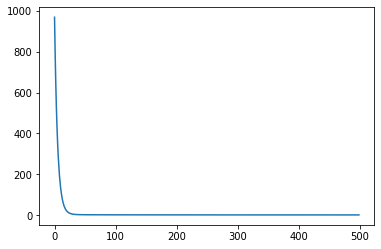

In [17]:
theta = np.random.rand(len(X[0]),1)
n = 500
learningRate = 0.05
thetaFinal, cost_history = gradient_descent(X, y, theta, learningRate = learningRate, nbIteration = n)
plt.plot(range(n), cost_history)

pred = model(X, thetaFinal)
print("R² score:", coef_determination(pred, y))

for i in range(10):
    success = "OK" if math.ceil(pred[i]) == y[i] else "NOT OK"
    print("prediction for", i, ":", math.ceil(pred[i]), '->', y[i] , "(" + success + ")")

# Show results

In [69]:
tmp = []
tmp2 = []
tmp3 = []

for i in range(100):
    tmp.append(math.ceil(pred[i][0]))
    tmp2.append(y[i][0])
    success = "OK" if math.ceil(pred[i]) == y[i] else "X"
    tmp3.append(success)
    
d = {'pred[i]': tmp, 'label[i]': tmp2, 'match?': tmp3}
df = pd.DataFrame(data=d)
pd.set_option('display.max_rows', df.shape[0]+1)
df

,pred[i],label[i],match?
0,5,5,OK
1,1,0,X
2,5,4,X
3,2,1,X
4,9,9,OK
5,4,2,X
6,2,1,X
7,5,3,X
8,2,1,X
9,4,4,OK
